# HTTP APIs _or_ how do I interact with remote data in my program?

# Your programming journey so far

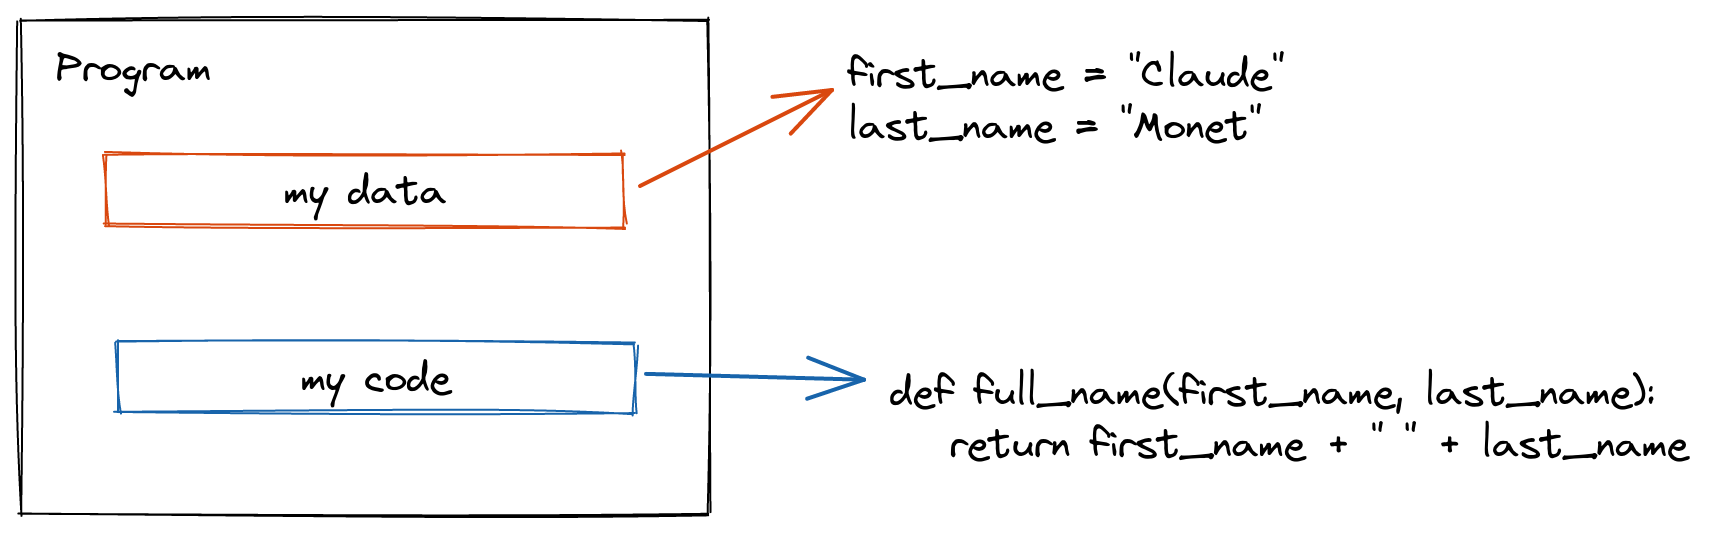

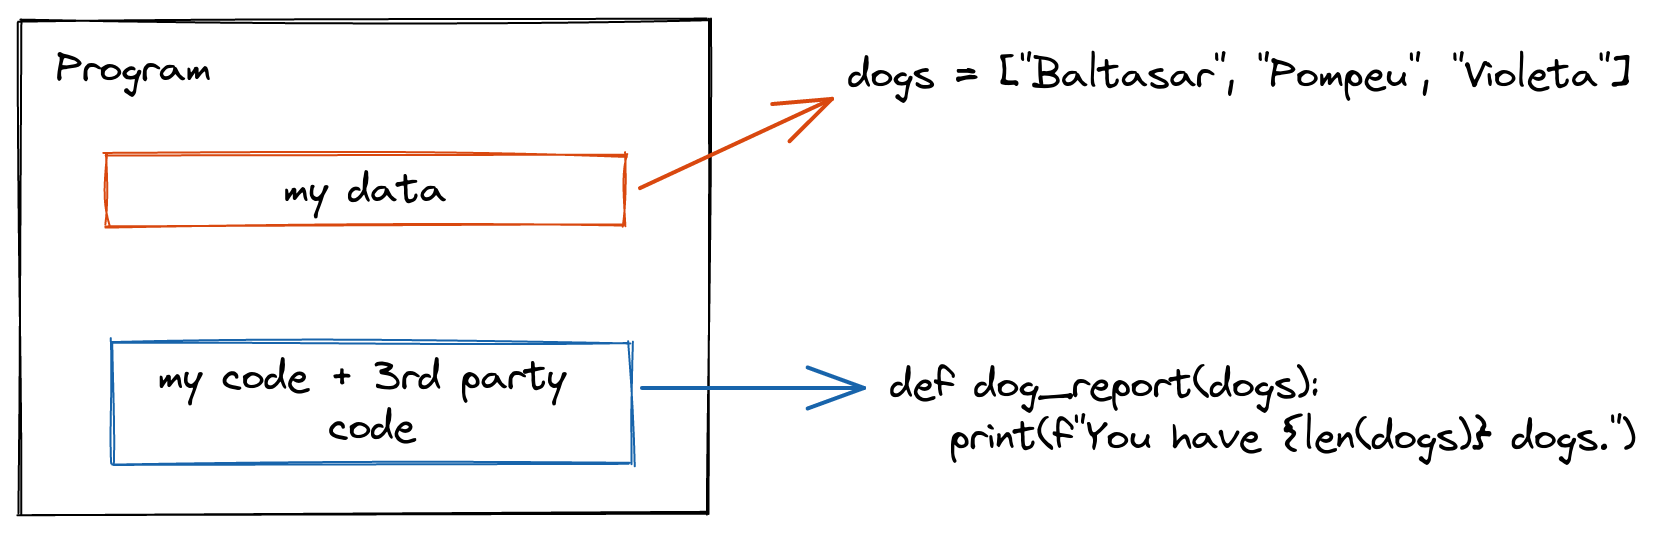

# What's next?

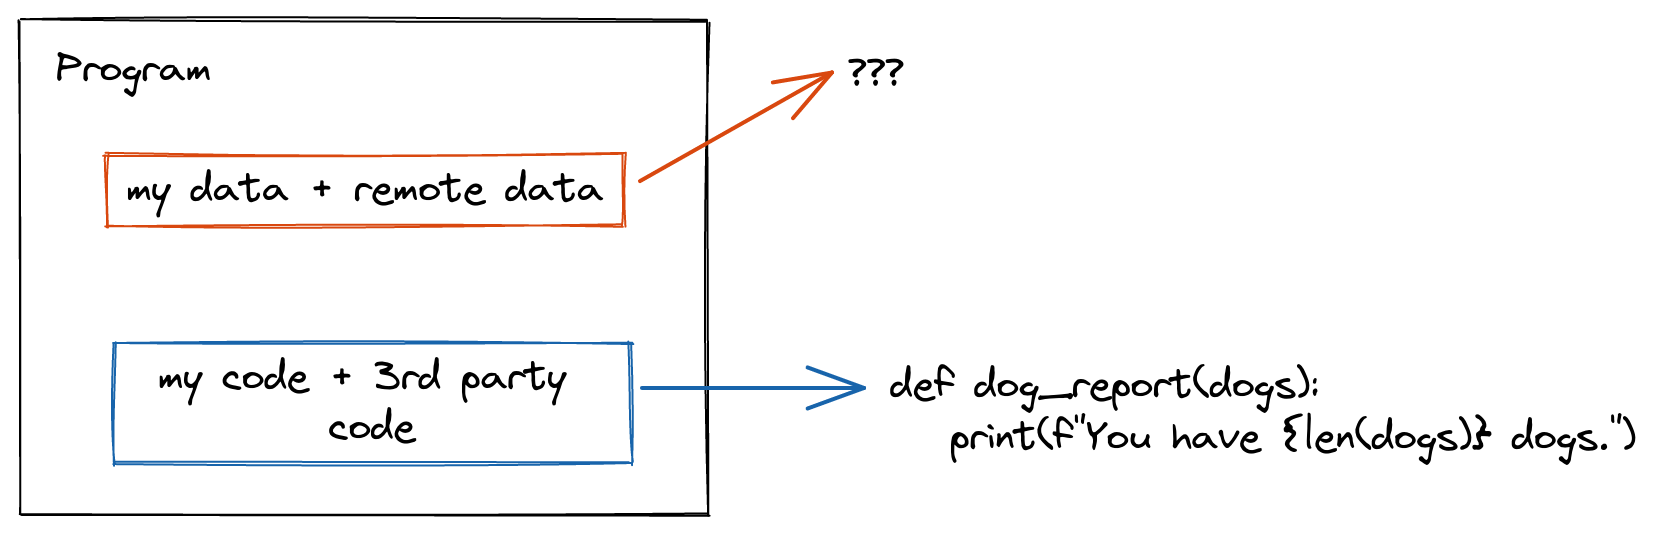

# Fetch remote data

Suppose you want to build an application for learning basic German vocabulary.

Question: What are the 100 most common German words?

Answer: No idea. [Look it up online](https://1000mostcommonwords.com/1000-most-common-german-words/).

# What happens when you enter a URL in the browser and press Enter?

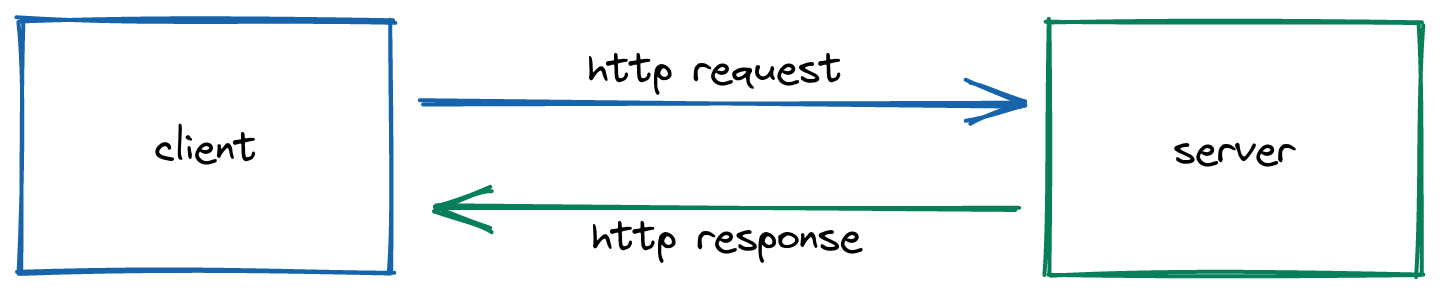

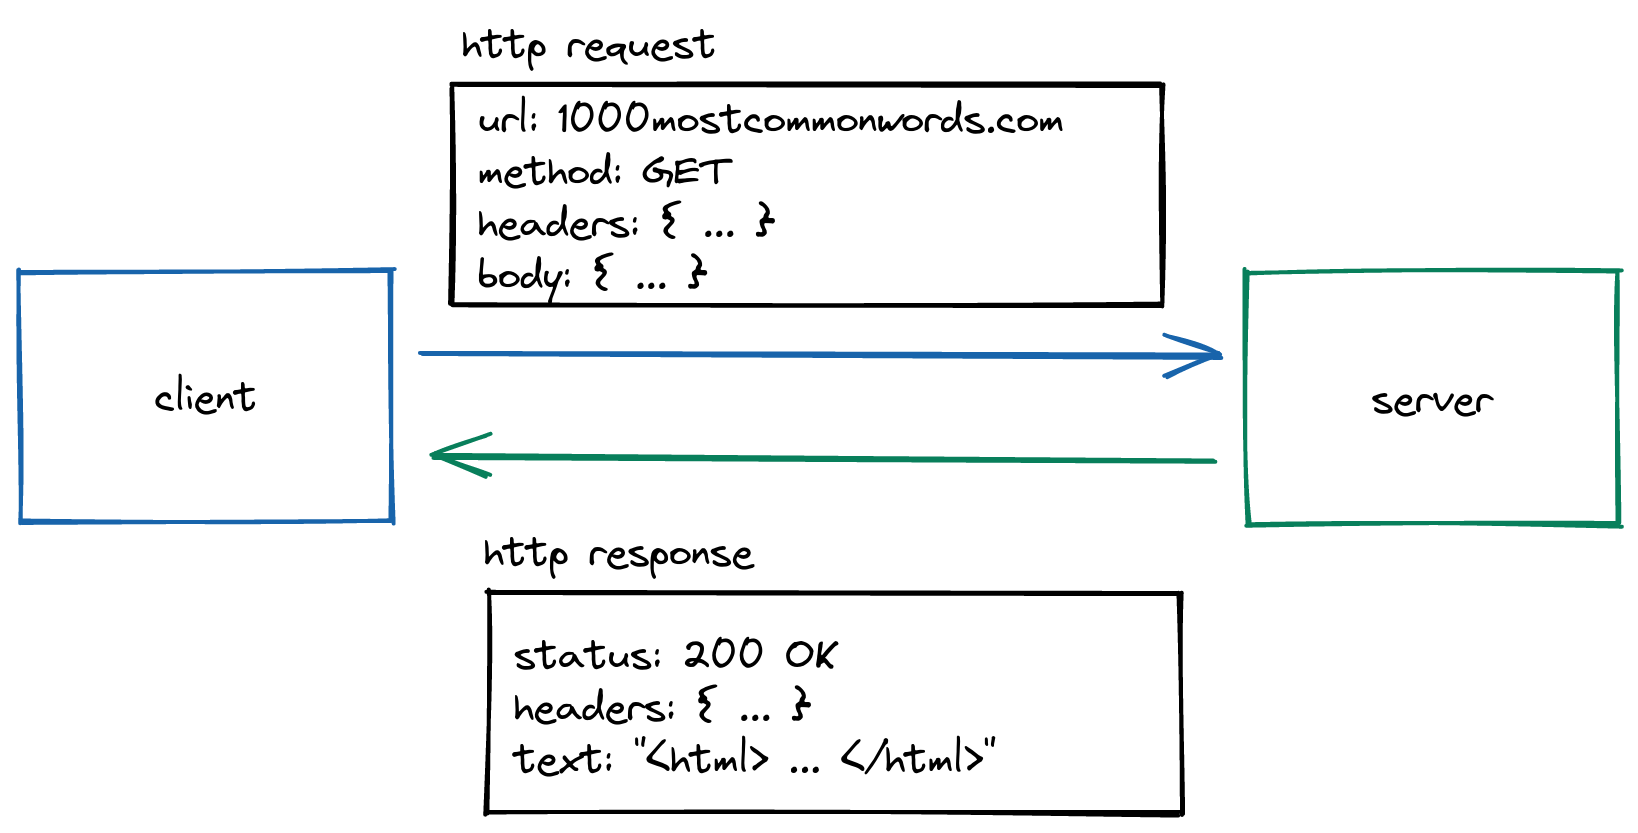

# Make requests from Python code 

Just like in a web browser, we can also make HTTP requests and get their response from a Python program. 

We just have to perform each step manually (instead of just pressing enter!)

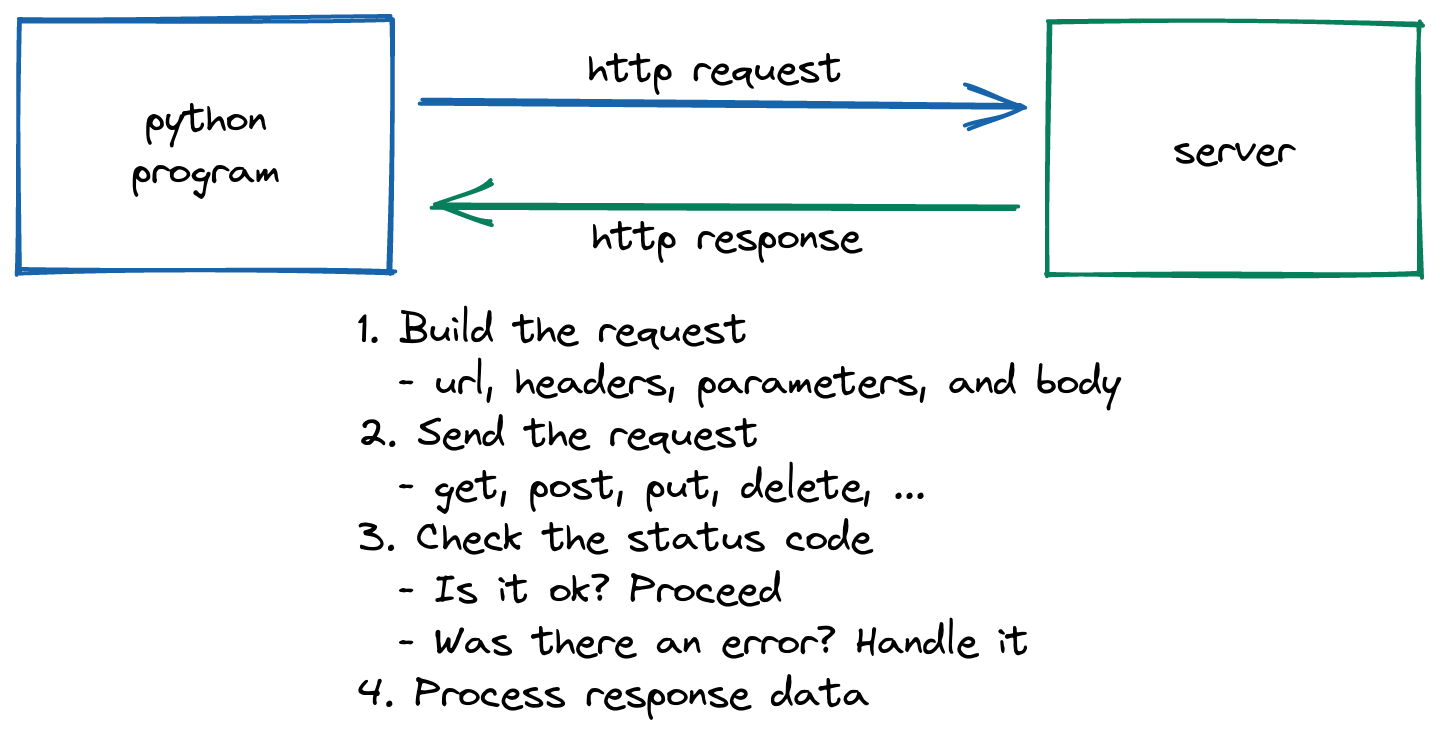

In [1]:
import requests
def get_common_german_words():
    # step 1 : build the request
    url = "https://1000mostcommonwords.com/1000-most-common-german-words/"
    
    # step 2 : make the request
    response = requests.get(url)
    
    # step 3 : error-handling
    if response.status_code != 200:
        print("Error!")
    
    else:
        # step 4 : process the data
        print(response.text)
get_common_german_words()

<!DOCTYPE html><html lang="sv-SE"><head><meta charset="UTF-8"/>
<script data-ezscrex='false' data-cfasync='false' data-pagespeed-no-defer>var __ez=__ez||{};__ez.stms=Date.now();__ez.evt={};__ez.script={};__ez.ck=__ez.ck||{};__ez.template={};__ez.template.isOrig=true;__ez.queue=(function(){var count=0,incr=0,items=[],timeDelayFired=false,hpItems=[],lpItems=[],allowLoad=true;var obj={func:function(name,funcName,parameters,isBlock,blockedBy,deleteWhenComplete,proceedIfError){var self=this;this.name=name;this.funcName=funcName;this.parameters=parameters===null?null:(parameters instanceof Array)?parameters:[parameters];this.isBlock=isBlock;this.blockedBy=blockedBy;this.deleteWhenComplete=deleteWhenComplete;this.isError=false;this.isComplete=false;this.isInitialized=false;this.proceedIfError=proceedIfError;this.isTimeDelay=false;this.process=function(){log("... func = "+name);self.isInitialized=true;self.isComplete=true;log("... func.apply: "+name);var funcs=self.funcName.split('.');var func

# What do I do with this weird HTML string?

Parse it using [Beautiful Soup](https://beautiful-soup-4.readthedocs.io/en/latest/) and extract the data you want. This process is typically called web scraping.

In [5]:
import requests
import bs4
def get_common_german_words():
    ## step 1 ##
    url = "https://1000mostcommonwords.com/1000-most-common-german-words/"
    ## step 2 ##
    response = requests.get(url)
    ## step 3 ##
    if response.status_code != 200:
        print("error")
        return None
    ## step 4 ##
    else:
        # parse the html response with beautiful soup
        html_parsed = bs4.BeautifulSoup(response.text, 'html.parser')
        # select all the rows, ignoring the first (the table header)
        rows = html_parsed.find_all("tr")[1:]
        for row in rows:
            data = row.find_all("td")
            ger = data[1].text
            eng = data[2].text
            print(ger, eng)
        
get_common_german_words()

wie as
ich I
seine his
dass that
er he
war was
für for
auf on
sind are
mit with
sie they
sein be
bei at
ein one
haben have
dies this
aus from
durch by
heiß hot
Wort word
aber but
was what
einige some
ist is
es it
Sie you
oder or
hatte had
die the
von of
zu to
und and
ein a
bei in
wir we
können can
aus out
andere other
waren were
die which
tun do
ihre their
Zeit time
wenn if
werden will
wie how
sagte said
ein an
jeder each
sagen tell
tut does
Satz set
drei three
wollen want
Luft air
gut well
auch also
spielen play
klein small
Ende end
setzen put
Zuhause home
lesen read
seits hand
Hafen port
groß large
buchstabieren spell
hinzufügen add
auch even
Lande land
hier here
muss must
groß big
hoch high
so such
folgen follow
Akt act
warum why
fragen ask
Männer men
Veränderung change
ging went
Licht light
Art kind
aus off
müssen need
Haus house
Bild picture
versuchen try
uns us
wieder again
Tier animal
Punkt point
Mutter mother
Welt world
in der Nähe von near
bauen build
selbst self
Erde earth
Va

# Not bad!

Yes, but ... 

+ We need to manually inspect the web page in order to extract data.
+ If the web page design structure changes our program breaks.
+ Quite complex on some websites (e.g. [twitter](twitter.com)).
+ Lots of useless details in each response.

# Remember the difference between `print` and `return`?

`print` is human-friendly, to show data to someone on the screen.

`return` is machine-friendly, to pass data around the program.

Colors, buttons, animations, tables, and other HTML elements are all for displaying data to humans.

From a program perspective, we want the __raw data without any noise__.

# Can we interact with a website in a machine-friendly way?

Yes, we can, by using its HTTP application programming interface (API).

# HTTP APIs

We covered the HTTP part in the previous slides (web browser for humans, `requests` for Python).

What is an interface?

# Interfaces

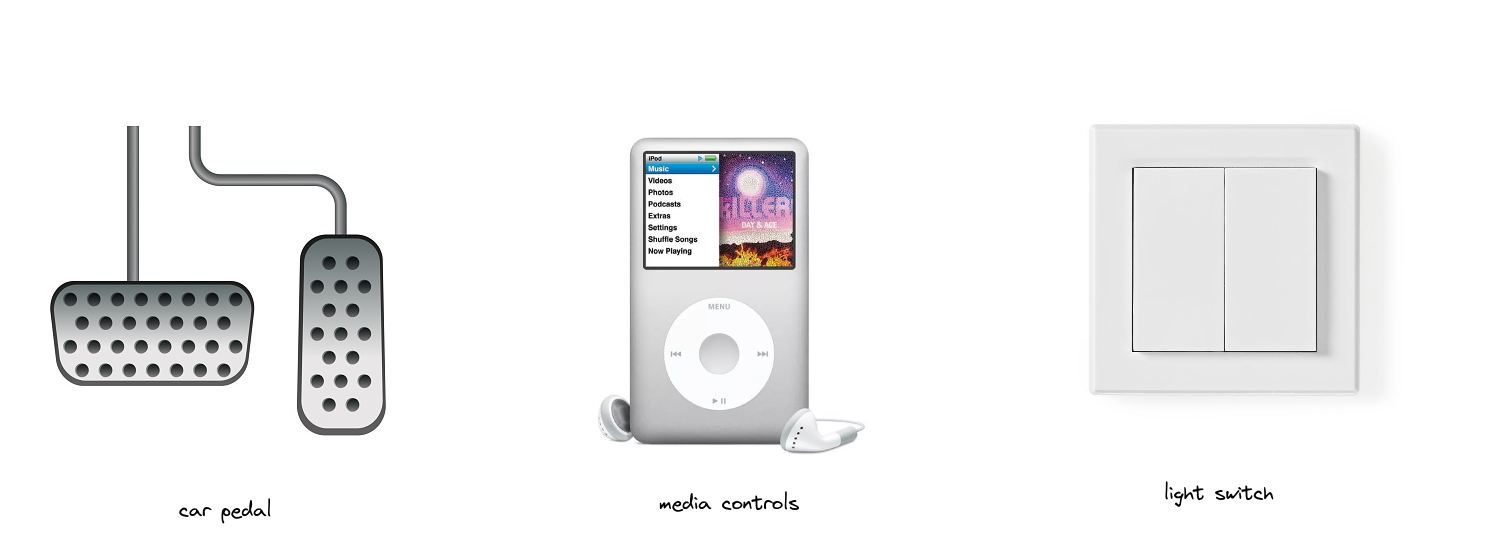

# Interfaces in Python

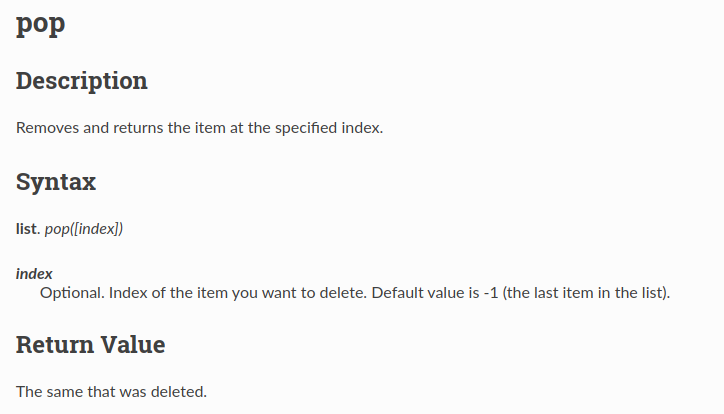

In [6]:
dogs = ["Baltasar", "Pompeu", "Violeta"]
deleted_dog = dogs.pop(2)
print(deleted_dog)
print(dogs)

Violeta
['Baltasar', 'Pompeu']


# Interfaces

Abstraction of some behaviour (e.g. pushing the brake pads against the wheel).

Follow the instructions and get the expected behaviour (e.g. click the pedal on the left and the car brakes).

Not concerned about the internal details (how the brake pads, hydraulic presses, ABS, etc. work).

# HTTP APIs

+ An HTTP API is a contract between the server and the client.
+ All details are stated in the documentation.
+ It defines the _request_ and  _response_ types as  well as the expected behaviour of all public _endpoints_ (methods) of a server.
+ Typically returns a response in Javascript Object Notation (`JSON`).

# HTTP APIs: a GET example

__Exercise__: Generate a report with the price in USD of the currently `n`-most traded crypto-currencies.

Use the API of CoinGecko available [here](https://www.coingecko.com/api/documentations/v3).

The API describes:
  + endpoint (`/coins/market`)
  + method (`GET`)
  + headers (`{}`)
  + parameters (`vs_currency`, `order`, and `per_page`)
  + response type (JSON `array` of `dict`s)

# HTTP APIs: a GET example

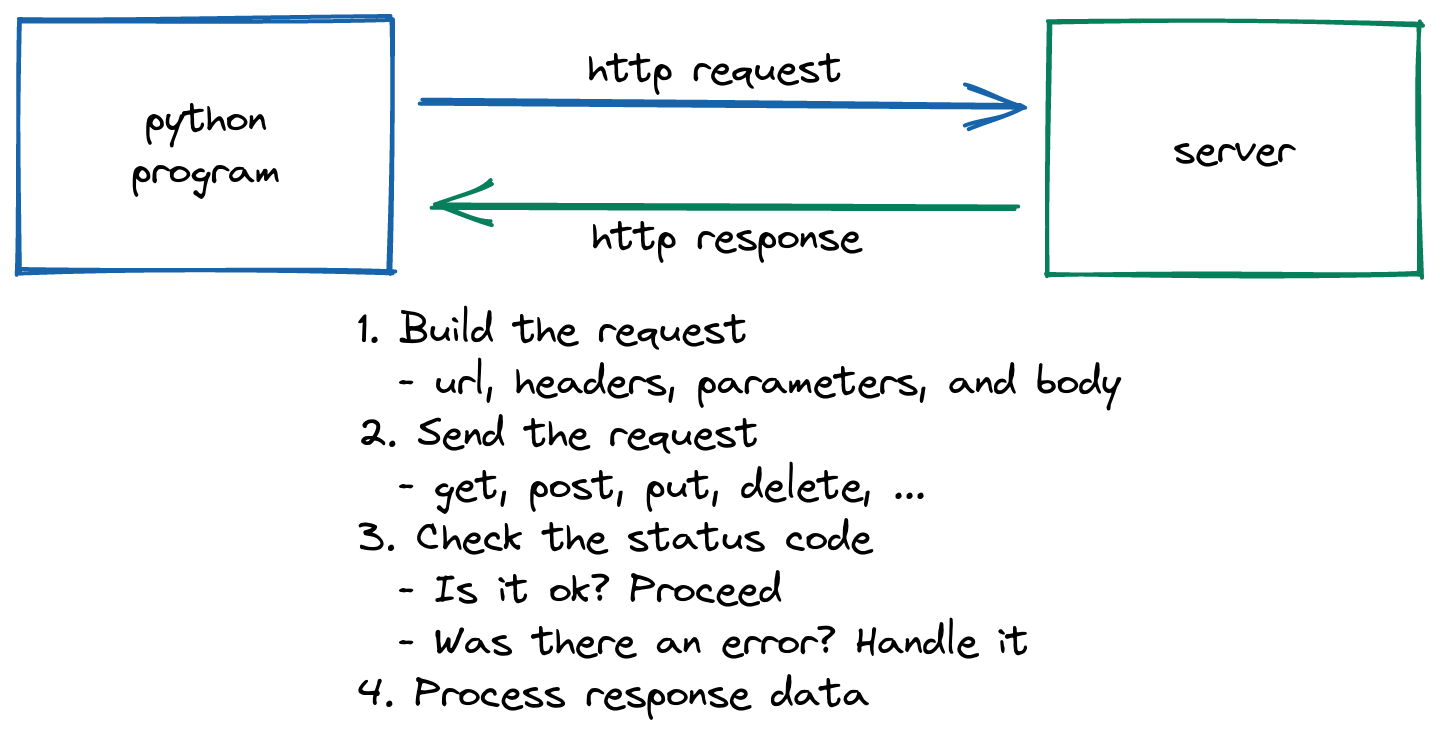

Make API request and parse JSON output to a Python dictionary (`response.json()`).

In [9]:
import requests

def report(n):
    tickers = top_volume_tickers(n)
    report = f"Here's your daily report for the {n} most active cryptos right now:\n"
    for i, t in enumerate(tickers):
        report += f"{i+1}. {t[0]} (${t[1].upper()}) is currently worth ${t[2]}.\n"
    return report

def top_volume_tickers(n):
    # step 1 : build the request
    url = "https://api.coingecko.com/api/v3/coins/markets"
    
    # set up parameters keys and corresponding values
    params = {
        "vs_currency": "usd",
        "order": "volume_desc",
        "per_page": n  
    }
    
    # step 2 : make the request
    response = requests.get(url, params)
    
    # step 3 : error-handling
    if response.status_code != 200:
        print("Error!")
    else:
        # step 4 : process the data
        
        # parse the response as json object
        json_parsed = response.json()
        
        # store the information we need in a list
        results = []
        for coin in json_parsed:
            symbol = coin["symbol"]
            name = coin["name"]
            price = coin["current_price"]
            results.append((name, symbol, price))
    
    return results

print(report(10))

Here's your daily report for the 10 most active cryptos right now:
1. Tether ($USDT) is currently worth $1.001.
2. Bitcoin ($BTC) is currently worth $40056.
3. Ethereum ($ETH) is currently worth $3030.39.
4. USD Coin ($USDC) is currently worth $0.997453.
5. Binance USD ($BUSD) is currently worth $0.999625.
6. XRP ($XRP) is currently worth $0.707732.
7. Terra ($LUNA) is currently worth $84.13.
8. VNDC ($VNDC) is currently worth $4.259e-05.
9. ABC Chain ($ABC) is currently worth $0.00274552.
10. WETH ($WETH) is currently worth $3028.09.



# HTTP APIs: a POST example

__Exercise__: Upload your crypto report to the web and return its full URL.

Use the API of https://paste.gg. Documentation available [here](https://github.com/ascclemens/paste/blob/master/api.md).

In [10]:
import requests
def upload_text(text):
    # step 1 : build the request
    url = "https://api.paste.gg/v1/pastes"
    
    headers = {
        "Content-Type" : "application/json"
    }
    
    data = {
      "name": "My crypto report",
      "description": "these are my files!",
      "visibility": "unlisted",
      "expires": "2023-07-14T14:07:00Z",
      "files": [
        {
          "name": "file_1.txt",
          "content": {
            "format": "text",
            "value": text
          }
        }
      ]
    }
    
    # step 2 : make the request
    # since the API requires the request data to be sent in JSON format,
    # we include it in the request with the keyword argument `json`.
    # in some cases, where the API requires URL-encoded data, we use
    # the keyword argument `data` instead of `json`.
    response = requests.post(url, headers=headers, json=data)
    
    # step 3 : error-handling
    # in this case, as stated in the API docs, the success code is 201 and not 200.
    if response.status_code != 201:
        print("Error!")
    
    else:
        # step 4 : process data
        json_parsed = response.json()
        result = json_parsed["result"]
        identifier = result["id"]
        return f"https://paste.gg/{identifier}"
    
crypto_report = report(10)
upload_text(crypto_report)

'https://paste.gg/f3b39ca32e5e4e4f8e0a85851e6c3bb9'

# HTTP APIs in Python: workflow

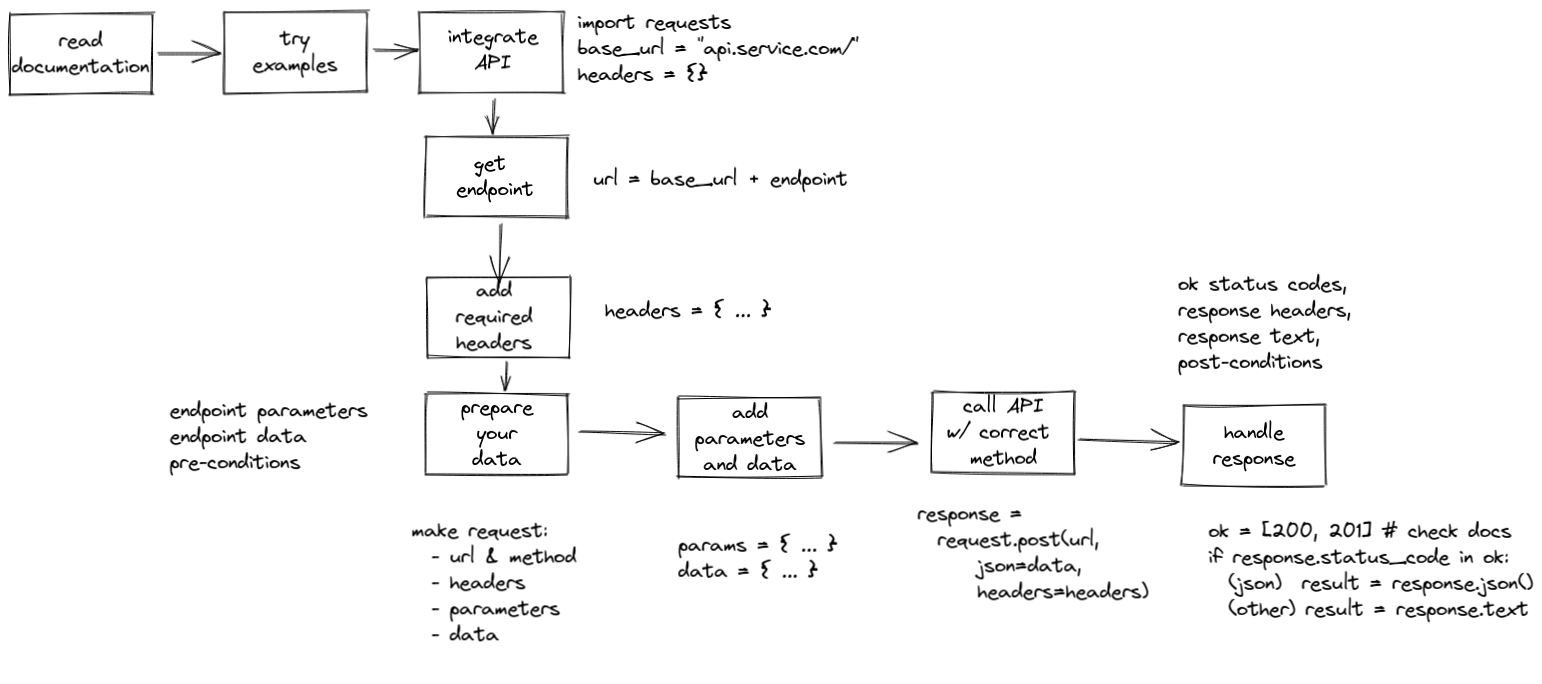